In [9]:
import pandas as pd
import pickle
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessMonthBegin
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pprint import pprint
plt.style.use('fivethirtyeight')

In [10]:
rider_df = pd.read_csv('poi_bike_distance_features.csv')

In [11]:
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8947728 entries, 0 to 8947727
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   started_at               object 
 2   start_station_id         int64  
 3   start_lat                float64
 4   start_lng                float64
 5   rider_demand             int64  
 6   bus_dist                 float64
 7   subway_dist              float64
 8   Population_density       float64
 9   Residential              float64
 10  Health Services          float64
 11  Public Safety            float64
 12  Water                    float64
 13  Miscellaneous            float64
 14  Education Facility       float64
 15  Cultural Facility        float64
 16  Recreational Facility    float64
 17  Social Services          float64
 18  Transportation Facility  float64
 19  Commercial               float64
 20  Government Facility      float64
 21  Religiou

In [12]:
rider_df.head()

,Unnamed: 0,started_at,start_station_id,start_lat,start_lng,rider_demand,bus_dist,subway_dist,Population_density,Residential,...,holidays,month,quarter,dayofyear,year,season,date,TMP,wind_speed,precipitation
0,0,2021-07-01,2782,40.635679,-74.020005,1,349.988075,345.111862,20495.098201,37.0,...,0,7,3,182,2021,3,2021-07-01,35.0,17.325,0.0
1,1,2021-07-01,2782,40.635679,-74.020005,1,349.988075,345.111862,20495.098201,37.0,...,0,7,3,182,2021,3,2021-07-01,35.0,13.950,0.0
2,2,2021-07-01,2782,40.635679,-74.020005,1,349.988075,345.111862,20495.098201,37.0,...,0,7,3,182,2021,3,2021-07-01,34.0,19.800,0.0
3,3,2021-07-01,2782,40.635679,-74.020005,1,349.988075,345.111862,20495.098201,37.0,...,0,7,3,182,2021,3,2021-07-01,31.1,22.050,1.0
4,4,2021-07-01,2782,40.635679,-74.020005,1,349.988075,345.111862,20495.098201,37.0,...,0,7,3,182,2021,3,2021-07-01,30.0,24.300,0.0


In [13]:
features = rider_df.loc[:,['start_lat', 'start_lng', 'hour', 'dayofyear','dayofweek', 'month','year',
                            'bus_dist', 'subway_dist',
                            'Population_density','Residential', 'Health Services', 'Public Safety', 'Water',
                            'Miscellaneous', 'Education Facility', 'Cultural Facility',
                            'Recreational Facility', 'Social Services', 'Transportation Facility',
                            'Commercial', 'Government Facility', 'Religious Institution','Shape_Leng','TMP','wind_speed','precipitation']]

In [14]:
features.sort_index()

,start_lat,start_lng,hour,dayofyear,dayofweek,month,year,bus_dist,subway_dist,Population_density,...,Recreational Facility,Social Services,Transportation Facility,Commercial,Government Facility,Religious Institution,Shape_Leng,TMP,wind_speed,precipitation
0,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,35.0,17.325,0.0
1,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,35.0,13.950,0.0
2,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,34.0,19.800,0.0
3,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,31.1,22.050,1.0
4,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,30.0,24.300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947723,40.817802,-73.905203,3,17,0,1,2022,286.265577,284.127944,20070.621743,...,3.0,3.0,4.0,1.0,2.0,7.0,7309.728534,2.2,20.925,2.5
8947724,40.707065,-74.007319,8,356,2,12,2021,194.283817,175.450331,27235.728354,...,7.0,10.0,1.0,2.0,12.0,4.0,3957.843797,5.6,10.350,0.0
8947725,40.707065,-74.007319,8,356,2,12,2021,194.283817,175.450331,27235.728354,...,7.0,10.0,1.0,2.0,12.0,4.0,3957.843797,5.6,6.975,0.0
8947726,40.766519,-73.971285,8,356,2,12,2021,382.204905,240.327430,6.527246,...,2.0,5.0,28.0,4.0,42.0,26.0,16642.782287,5.6,10.350,0.0


In [15]:
target = rider_df['rider_demand']

In [16]:
features['month'] = features['month'].astype('int')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=1)

In [18]:
# 构建测试集与训练集
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
#take 17mins
clf = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=5, min_samples_leaf=4, random_state=1)
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [20]:
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)
print(f"Train MAE for decision tree:{mae_train}")
print(f"Test MAE for decision tree:{mae_test}")
print(f"Train r2 score for decision tree:{r2_train}")
print(f"Test r2 score for decision tree:{r2_test}")

Train MAE for decision tree:1.1131732958350409
Test MAE for decision tree:1.5938379529661535
Train r2 score for decision tree:0.9214859970978424
Test r2 score for decision tree:0.8414122397336181


In [21]:
mse_train = mean_squared_error(y_train, predictions_train)
mse_train

3.8948494057417475

In [22]:
rmse_train = np.sqrt(mse_train)
rmse_train

1.9735372825821527

In [18]:
#take 12mins
# not good hyperparameters
clf = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=5, min_samples_leaf=4, random_state=1)
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [45]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

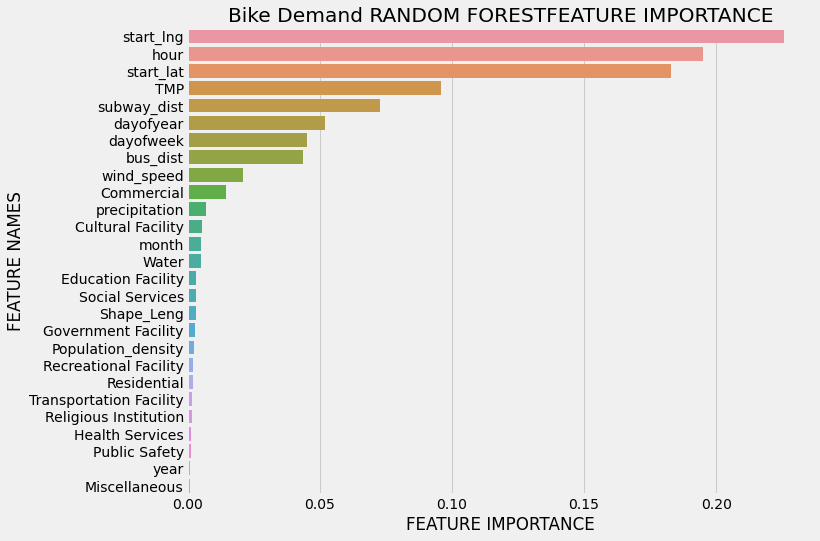

In [46]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'Bike Demand RANDOM FOREST')

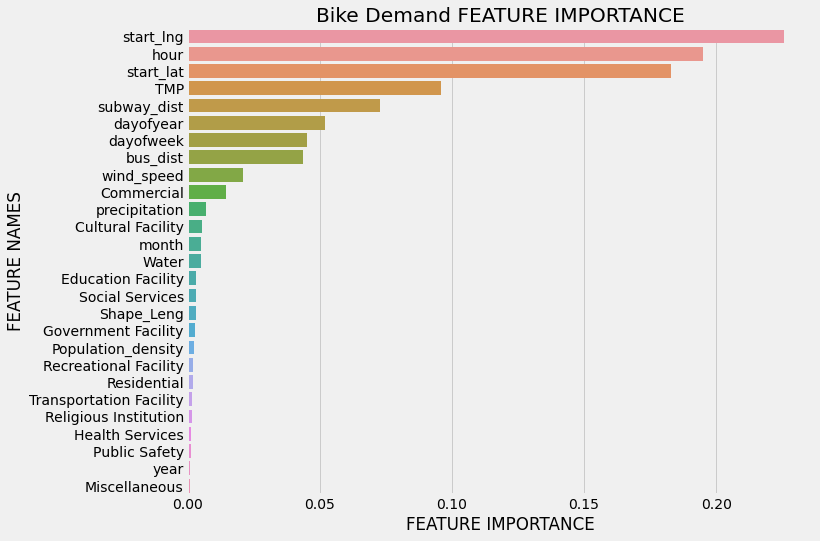

In [57]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'Bike Demand ')

In [17]:
# 超参调整 hypyter tunning

In [37]:
8947727*0.1

894772.7000000001

In [11]:
n = int(8947727*0.1)
rider_df_1 = rider_df.sample(n=n, random_state=1)

In [12]:
len(rider_df_1)

894772

In [13]:
features = rider_df_1.loc[:,['start_lat', 'start_lng', 'hour', 'dayofyear','dayofweek', 'month','year',
                            'bus_dist', 'subway_dist',
                            'Population_density','Residential', 'Health Services', 'Public Safety', 'Water',
                            'Miscellaneous', 'Education Facility', 'Cultural Facility',
                            'Recreational Facility', 'Social Services', 'Transportation Facility',
                            'Commercial', 'Government Facility', 'Religious Institution','Shape_Leng','TMP','wind_speed','precipitation']]

In [14]:
features['month'] = features['month'].astype('int')

In [15]:
target = rider_df_1['rider_demand']

In [61]:
target

0          1
1          1
2          1
3          1
4          1
          ..
8947723    1
8947724    1
8947725    1
8947726    1
8947727    1
Name: rider_demand, Length: 8947728, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=1)

In [17]:
len(X_train)

626340

In [49]:
#take 50 seconds
clf = RandomForestRegressor(n_estimators=20, max_depth=30, min_samples_split=5, min_samples_leaf=4, random_state=1)
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [50]:
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)
print(f"Train MAE for decision tree:{mae_train}")
print(f"Test MAE for decision tree:{mae_test}")
print(f"Train r2 score for decision tree:{r2_train}")
print(f"Test r2 score for decision tree:{r2_test}")

Train MAE for decision tree:1.3245229943942638
Test MAE for decision tree:1.985028435956049
Train r2 score for decision tree:0.8866089799567143
Test r2 score for decision tree:0.7594109578168384


In [37]:
x = np.arange(2,60,10)
r2_trains = []
r2_tests = []
for split in x:
    print(split)
    clf = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=split, min_samples_leaf=4, random_state=1)
    clf.fit(X_train, y_train)
    predictions_train = clf.predict(X_train)
    predictions_test = clf.predict(X_test)
    r2_train = r2_score(y_train, predictions_train)
    print(r2_train)
    r2_test = r2_score(y_test, predictions_test)
    print(r2_test)
    r2_trains.append(r2_train)
    r2_tests.append(r2_test)

2
0.8818558064879392
0.7512451500560287
12
0.8643403378369551
0.7511682853581425
22
0.8297191217748526
0.7476352267411039
32
0.8066760787615317
0.7425300308781884
42
0.7896840422911331
0.7370513615989172
52
0.7757658598668792
0.7317959395549466


In [32]:
r2_trains

[0.8818558064879392,
 0.8643403378369551,
 0.8297191217748526,
 0.8066760787615317]

Text(0, 0.5, 'r2 score')

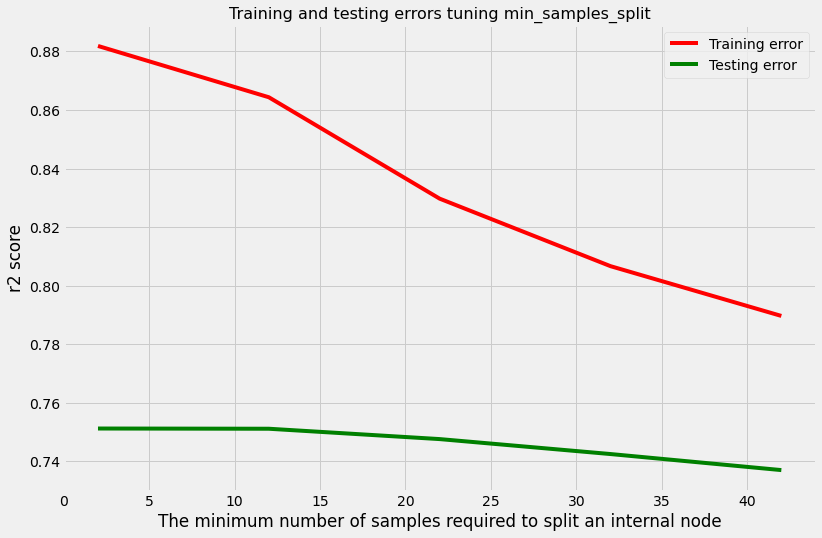

In [36]:
plt.figure(figsize=(12,8))
plt.plot(x, r2_trains, label='Training error', color='red')
plt.plot(x, r2_tests, label='Testing error', color='green')
plt.legend()
plt.title('Training and testing errors tuning min_samples_split', fontsize=16)
plt.xlabel('The minimum number of samples required to split an internal node')
plt.ylabel('r2 score')

In [40]:
x = np.arange(2,20,5)
r2_trains = []
r2_tests = []
for split in x:
    print(split)
    clf = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=10, min_samples_leaf=split, random_state=1)
    clf.fit(X_train, y_train)
    predictions_train = clf.predict(X_train)
    predictions_test = clf.predict(X_test)
    r2_train = r2_score(y_train, predictions_train)
    print(r2_train)
    r2_test = r2_score(y_test, predictions_test)
    print(r2_test)
    r2_trains.append(r2_train)
    r2_tests.append(r2_test)

2
0.8887411300786324
0.7516943707443372
7
0.8388266583811327
0.7481365031829621
12
0.7996756089048501
0.7407297117155431
17
0.7756345491602032
0.7317719482055731


Text(0, 0.5, 'r2 score')

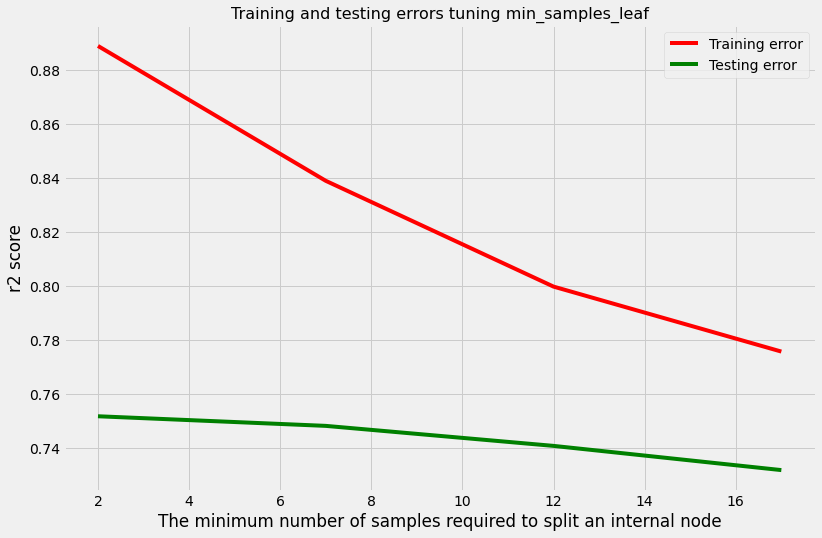

In [43]:
plt.figure(figsize=(12,8))
plt.plot(x, r2_trains, label='Training error', color='red')
plt.plot(x, r2_tests, label='Testing error', color='green')
plt.legend()
plt.title('Training and testing errors tuning min_samples_leaf', fontsize=16)
plt.xlabel('The minimum number of samples required to split an internal node')
plt.ylabel('r2 score')

In [51]:
x = np.arange(30, 6, -3)
r2_trains = []
r2_tests = []
for leafd in x:
    print(leafd)
    clf = RandomForestRegressor(n_estimators=10, max_depth=leafd, min_samples_split=30, min_samples_leaf=10, random_state=1)
    clf.fit(X_train, y_train)
    predictions_train = clf.predict(X_train)
    predictions_test = clf.predict(X_test)
    r2_train = r2_score(y_train, predictions_train)
    print(r2_train)
    r2_test = r2_score(y_test, predictions_test)
    print(r2_test)
    r2_trains.append(r2_train)
    r2_tests.append(r2_test)
    

30
0.79616927562864
0.7402534041612057
27
0.7947673007563631
0.7394271702245203
24
0.789282936990668
0.736160605481804
21
0.7740442488353045
0.7263066798909421
18
0.7406397528639324
0.7043157881181519
15
0.6749921551972351
0.6535581084172372
12
0.5756161523311727
0.5679314437618297
9
0.4706204931016914
0.4688040870962521


Text(0, 0.5, 'r2 score')

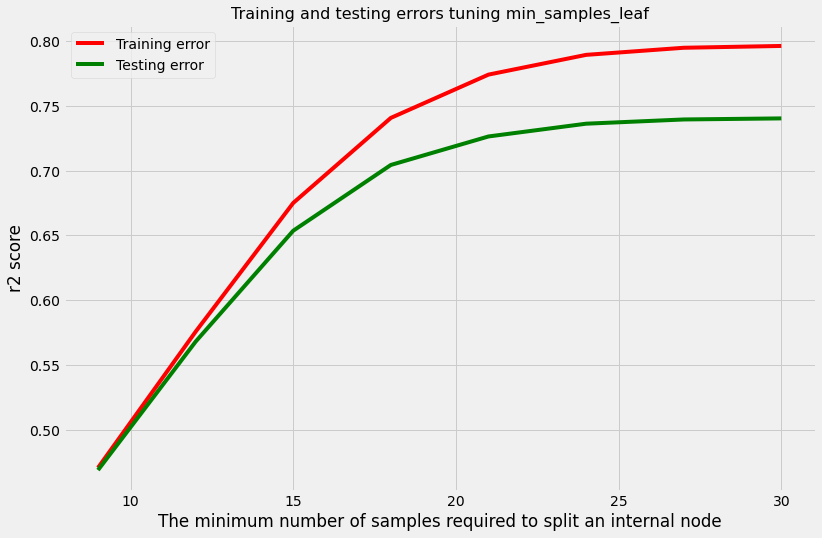

In [52]:
plt.figure(figsize=(12,8))
plt.plot(x, r2_trains, label='Training error', color='red')
plt.plot(x, r2_tests, label='Testing error', color='green')
plt.legend()
plt.title('Training and testing errors tuning min_samples_leaf', fontsize=16)
plt.xlabel('The minimum number of samples required to split an internal node')
plt.ylabel('r2 score')

In [47]:
x = np.arange(10, 31, 4)
r2_trains = []
r2_tests = []
for nestim in x:
    print(nestim)
    clf = RandomForestRegressor(n_estimators=nestim, max_depth=30, min_samples_split=30, min_samples_leaf=10, random_state=1)
    clf.fit(X_train, y_train)
    predictions_train = clf.predict(X_train)
    predictions_test = clf.predict(X_test)
    r2_train = r2_score(y_train, predictions_train)
    print(r2_train)
    r2_test = r2_score(y_test, predictions_test)
    print(r2_test)
    r2_trains.append(r2_train)
    r2_tests.append(r2_test)

10
0.79616927562864
0.7402534041612057
14
0.7990655977912898
0.7431431386269433
18
0.8004988948185585
0.7448171256919117
22
0.8013879430162166
0.7459674276065521
26
0.8021501872229448
0.7466747560627598
30
0.8029244004783391
0.7471318296496392


Text(0, 0.5, 'r2 score')

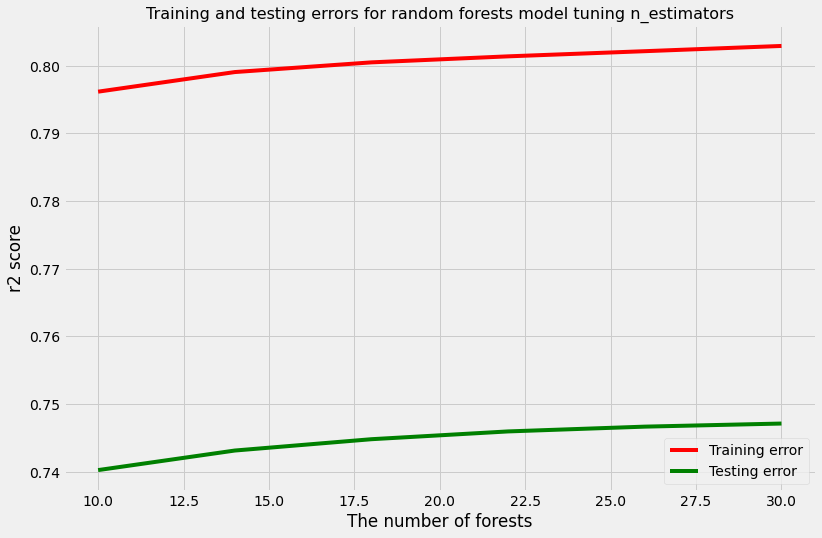

In [48]:
plt.figure(figsize=(12,8))
plt.plot(x, r2_trains, label='Training error', color='red')
plt.plot(x, r2_tests, label='Testing error', color='green')
plt.legend()
plt.title('Training and testing errors for random forests model tuning n_estimators', fontsize=16)
plt.xlabel('The number of forests')
plt.ylabel('r2 score')

In [23]:
from sklearn.tree import export_graphviz

In [25]:
len(clf.estimators_)

10

In [27]:
from sklearn import tree

In [29]:
clf.estimators_[0].tree_.max_depth

53

In [43]:
rider_df[rider_df['rider_demand'] == 100]

,Unnamed: 0,started_at,start_station_id,start_lat,start_lng,rider_demand,bus_dist,subway_dist,Population_density,Residential,...,holidays,month,quarter,dayofyear,year,season,date,TMP,wind_speed,precipitation
114207,114207,2021-07-11 18:00:00,5788,40.731658,-73.989794,100,248.246032,173.332148,35961.286380,34.0,...,0,7,3,192,2021,3,2021-07-11,24.4,9.225,0.0
114208,114208,2021-07-11 18:00:00,5788,40.731658,-73.989794,100,248.246032,173.332148,35961.286380,34.0,...,0,7,3,192,2021,3,2021-07-11,25.6,11.475,0.0
415357,415357,2021-08-10 18:00:00,5329,40.716803,-74.013160,100,90.624802,415.452542,13744.702152,21.0,...,0,8,3,222,2021,3,2021-08-10,27.8,9.225,0.0
415358,415358,2021-08-10 18:00:00,5329,40.716803,-74.013160,100,90.624802,415.452542,13744.702152,21.0,...,0,8,3,222,2021,3,2021-08-10,28.9,9.225,0.0
660646,660646,2021-09-08 18:00:00,5788,40.731183,-73.990134,100,248.246032,173.332148,35961.286380,34.0,...,0,9,3,251,2021,4,2021-09-08,28.9,20.925,0.0
660647,660647,2021-09-08 18:00:00,5788,40.731183,-73.990134,100,248.246032,173.332148,35961.286380,34.0,...,0,9,3,251,2021,4,2021-09-08,27.8,19.800,0.0
774573,774573,2021-09-21 17:00:00,5329,40.716777,-74.013158,100,90.624802,415.452542,13744.702152,21.0,...,0,9,3,264,2021,4,2021-09-21,23.3,12.825,0.0
795719,795719,2021-09-24 17:00:00,5329,40.716957,-74.013173,100,90.624802,415.452542,13744.702152,21.0,...,0,9,3,267,2021,4,2021-09-24,23.3,8.100,0.0
822686,822686,2021-09-27 17:00:00,6364,40.749264,-73.988310,100,87.393078,49.990622,12595.152887,25.0,...,0,9,3,270,2021,4,2021-09-27,26.1,12.825,0.0
923217,923217,2021-10-11 17:00:00,6659,40.758809,-73.974320,100,273.994053,203.131784,26032.468848,18.0,...,0,10,4,284,2021,4,2021-10-11,21.7,19.800,0.0


In [52]:
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8947728 entries, 0 to 8947727
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   started_at               object 
 2   start_station_id         int64  
 3   start_lat                float64
 4   start_lng                float64
 5   rider_demand             int64  
 6   bus_dist                 float64
 7   subway_dist              float64
 8   Population_density       float64
 9   Residential              float64
 10  Health Services          float64
 11  Public Safety            float64
 12  Water                    float64
 13  Miscellaneous            float64
 14  Education Facility       float64
 15  Cultural Facility        float64
 16  Recreational Facility    float64
 17  Social Services          float64
 18  Transportation Facility  float64
 19  Commercial               float64
 20  Government Facility      float64
 21  Religiou

In [60]:
rider_df[(rider_df['date'] == '2022-06-08')]

,Unnamed: 0,started_at,start_station_id,start_lat,start_lng,rider_demand,bus_dist,subway_dist,Population_density,Residential,...,holidays,month,quarter,dayofyear,year,season,date,TMP,wind_speed,precipitation
1965494,1965494,2022-06-08 12:00:00,2782,40.635679,-74.020005,2,349.988075,345.111862,20495.098201,37.0,...,0,6,2,159,2022,3,2022-06-08,22.8,9.225,0.0
1965495,1965495,2022-06-08 12:00:00,2782,40.635679,-74.020005,2,349.988075,345.111862,20495.098201,37.0,...,0,6,2,159,2022,3,2022-06-08,23.9,10.350,0.0
1965496,1965496,2022-06-08 12:00:00,2883,40.638246,-74.024714,1,291.545354,354.332664,20495.098201,37.0,...,0,6,2,159,2022,3,2022-06-08,22.8,9.225,0.0
1965497,1965497,2022-06-08 12:00:00,2883,40.638246,-74.024714,1,291.545354,354.332664,20495.098201,37.0,...,0,6,2,159,2022,3,2022-06-08,23.9,10.350,0.0
1965498,1965498,2022-06-08 12:00:00,3243,40.649143,-74.012384,1,405.522550,238.546830,20495.098201,37.0,...,0,6,2,159,2022,3,2022-06-08,22.8,9.225,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022366,8022366,2022-06-08 00:00:00,3376,40.651847,-73.965248,2,494.906586,272.802678,26931.178620,36.0,...,0,6,2,159,2022,3,2022-06-08,21.1,19.800,0.0
8022367,8022367,2022-06-08 00:00:00,3303,40.649681,-73.967829,1,410.152663,501.153744,26931.178620,36.0,...,0,6,2,159,2022,3,2022-06-08,21.1,19.800,0.0
8022368,8022368,2022-06-08 00:00:00,3303,40.649681,-73.967829,1,410.152663,501.153744,26931.178620,36.0,...,0,6,2,159,2022,3,2022-06-08,21.1,19.800,0.0
8022369,8022369,2022-06-08 00:00:00,6700,40.759738,-73.978116,1,154.174102,288.499139,0.000000,2.0,...,0,6,2,159,2022,3,2022-06-08,21.1,19.800,0.0
